# Initial Evaluation

Load all dataframes and observe the data.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
matches = pd.read_csv('./data/WorldCupMatches.csv')
players = pd.read_csv('./data/WorldCupPlayers.csv')
cups = pd.read_csv('./data/WorldCups.csv')

Let's start with matches dataframe

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
dtype

In [7]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [11]:
matches['Referee'].unique()

array(['LOMBARDI Domingo (URU)', 'MACIAS Jose (ARG)',
       'TEJADA Anibal (URU)', 'WARNKEN Alberto (CHI)',
       'REGO Gilberto (BRA)', 'CRISTOPHE Henry (BEL)',
       'MATEUCCI Francisco (URU)', 'LANGENUS Jean (BEL)',
       'SAUCEDO Ulises (BOL)', 'BALWAY Thomas (FRA)',
       'VALLARINO Ricardo (URU)', 'VAN MOORSEL Johannes (NED)',
       'BARLASSINA Rinaldo (ITA)', 'EKLIND Ivan (SWE)',
       'BRAUN Eugen (AUT)', 'MATTEA Francesco (ITA)',
       'BIRLEM Alfred (GER)', 'MERCET Rene (SUI)', 'BERANEK Alois (AUT)',
       'BAERT Louis (BEL)', 'CARRARO Albino (ITA)', 'CONRIE Roger (FRA)',
       'WUETHRICH Hans (SUI)', 'SCARPI Giuseppe (ITA)',
       'LECLERCQ Lucien (FRA)', 'VON HERTZKA Pal (HUN)',
       'KRIST Gustav (TCH)', 'CAPDEVILLE Georges (FRA)',
       'READER George (ENG)', 'VAN DER MEER Karel (NED)',
       'VIANA Mario (BRA)', 'LUTZ Jean (SUI)', 'GALEATI Giovanni (ITA)',
       'AZON ROMA Ramon (ESP)', 'LEAFE Reginald (ENG)',
       'MALCHER Alberto (BRA)', 'MITCHELL Rob

Find winners and make a winning team column

In [12]:
home_team_wins = matches[(matches['Home Team Goals'] > matches['Away Team Goals'])]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


In [15]:
away_team_wins = matches[(matches['Away Team Goals'] > matches['Home Team Goals'])]

In [16]:
# set default value
matches['Winner'] = matches['Home Team Name']
matches['Winner'][matches['Home Team Goals'] > matches['Away Team Goals']] = matches['Home Team Name']
matches['Winner'][matches['Home Team Goals'] < matches['Away Team Goals']] = matches['Away Team Name']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Winner'],
      dtype='object')

In [18]:
matches['Winner'].head()

0        France
1           USA
2    Yugoslavia
3       Romania
4     Argentina
Name: Winner, dtype: object

Looks like there are some values with NaN. Let's figure that out.

In [25]:
matches.isna().count()

Year                    4572
Datetime                4572
Stage                   4572
Stadium                 4572
City                    4572
Home Team Name          4572
Home Team Goals         4572
Away Team Goals         4572
Away Team Name          4572
Win conditions          4572
Attendance              4572
Half-time Home Goals    4572
Half-time Away Goals    4572
Referee                 4572
Assistant 1             4572
Assistant 2             4572
RoundID                 4572
MatchID                 4572
Home Team Initials      4572
Away Team Initials      4572
Winner                  4572
dtype: int64

Atleast something here is consistent. Must find out where this happens

In [26]:
matches[(matches.isna() == True)]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


It appears all columns after 852 rows are null. I will drop them to clean up this data. But first I want to know the earliest and latest date that occurs and hopefully it adds up to an 80 year difference. 20 World cups. 4 years apart.

In [31]:
earliest = matches['Year'].min()

In [32]:
latest = matches['Year'].max()

In [33]:
latest - earliest

84.0

Cool, so out of the 852 rows. I have the correct data. For some reason there are a lot of additional empty rows.

In [34]:
matches.dropna(inplace=True)

In [35]:
matches.isna().count()

Year                    850
Datetime                850
Stage                   850
Stadium                 850
City                    850
Home Team Name          850
Home Team Goals         850
Away Team Goals         850
Away Team Name          850
Win conditions          850
Attendance              850
Half-time Home Goals    850
Half-time Away Goals    850
Referee                 850
Assistant 1             850
Assistant 2             850
RoundID                 850
MatchID                 850
Home Team Initials      850
Away Team Initials      850
Winner                  850
dtype: int64

In [39]:
matches['Winner'].tail()

847    Netherlands
848        Germany
849    Netherlands
850    Netherlands
851        Germany
Name: Winner, dtype: object

Time to group by teams who win

In [43]:
winners = matches.groupby('Winner')
winners['Winner'].unique().count()

68

Lets count the amount of times each winning team has one

In [44]:
winners.agg({'Winner':'count'})

,Winner
Winner,
Algeria,5
Argentina,49
Australia,3
Austria,13
Belgium,18
Brazil,85
Bulgaria,6
Cameroon,6
Chile,14


Good start so far with the matches dataframe. Let's take a look at the players data frame

In [47]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
RoundID          37784 non-null int64
MatchID          37784 non-null int64
Team Initials    37784 non-null object
Coach Name       37784 non-null object
Line-up          37784 non-null object
Shirt Number     37784 non-null int64
Player Name      37784 non-null object
Position         4143 non-null object
Event            9069 non-null object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [48]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [52]:
len(players['Player Name'].unique())

7663

In [57]:
len(players.MatchID.unique())

836

In [58]:
players['Line-up'].unique()

array(['S', 'N'], dtype=object)

In [59]:
len(players.RoundID.unique())

101

Well it looks like the Data from Players does not help much. If there was a column that said the number of goals scored or some type of a metric on performance then we could use that as a useful feature.

Time to look at cups data

In [61]:
cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null object
Winner            20 non-null object
Runners-Up        20 non-null object
Third             20 non-null object
Fourth            20 non-null object
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null object
dtypes: int64(4), object(6)
memory usage: 1.6+ KB


In [62]:
cups['Winner']

0        Uruguay
1          Italy
2          Italy
3        Uruguay
4     Germany FR
5         Brazil
6         Brazil
7        England
8         Brazil
9     Germany FR
10     Argentina
11         Italy
12     Argentina
13    Germany FR
14        Brazil
15        France
16        Brazil
17         Italy
18         Spain
19       Germany
Name: Winner, dtype: object

In [63]:
cups['Year'].max()

2014

Bummer. It does not include the most recent world cup of 2018 where France wins

In [65]:
cups['Winner'].unique()

array(['Uruguay', 'Italy', 'Germany FR', 'Brazil', 'England', 'Argentina',
       'France', 'Spain', 'Germany'], dtype=object)

In [67]:
cups['Runners-Up']

0          Argentina
1     Czechoslovakia
2            Hungary
3             Brazil
4            Hungary
5             Sweden
6     Czechoslovakia
7         Germany FR
8              Italy
9        Netherlands
10       Netherlands
11        Germany FR
12        Germany FR
13         Argentina
14             Italy
15            Brazil
16           Germany
17            France
18       Netherlands
19         Argentina
Name: Runners-Up, dtype: object

In [70]:
cups['Runners-Up'].unique()

array(['Argentina', 'Czechoslovakia', 'Hungary', 'Brazil', 'Sweden',
       'Germany FR', 'Italy', 'Netherlands', 'Germany', 'France'],
      dtype=object)

In [71]:
cups['MatchesPlayed']

0     18
1     17
2     18
3     22
4     26
5     35
6     32
7     32
8     32
9     38
10    38
11    52
12    52
13    52
14    52
15    64
16    64
17    64
18    64
19    64
Name: MatchesPlayed, dtype: int64

the last 5 world cups have a total of 64 matches.

I think I could make a probability distribution based off the teams who have won and made runners up in the last 20 world cups.

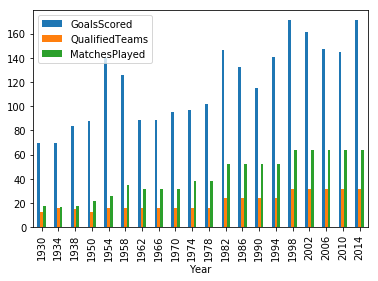

In [75]:
cups.plot('Year', kind='bar')

<BarContainer object of 20 artists>

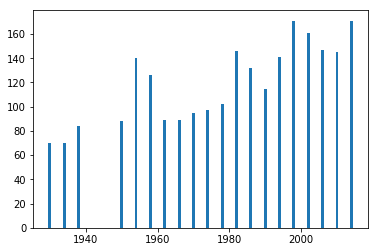

In [80]:
x = cups['Year']
y = cups['GoalsScored']
plt.bar(x,y)

Lets try to merge matches and players to get a big dataframe.

In [94]:
df = pd.merge(matches,players,how='inner',on='MatchID')
df

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Away Team Initials,Winner,RoundID_y,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
7,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
8,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
9,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,MEX,LUQUE Juan (MEX),S,0,Dionisio MEJIA,NaN,NaN


In [95]:
df.set_index('MatchID','Winner')

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Away Team Initials,Winner,RoundID_y,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
MatchID,,,,,,,,,,,,,,,,,,,,,
1096.0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1096.0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
1096.0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
1096.0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
1096.0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
1096.0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
1096.0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
1096.0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
1096.0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,MEX,France,201,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN


Drop unnecessary columns

In [97]:
df.drop(['Win conditions','Team Initials','Line-up','Shirt Number'], axis=1,inplace=True)

In [98]:
df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance',
       'Half-time Home Goals', 'Half-time Away Goals', 'Referee',
       'Assistant 1', 'Assistant 2', 'RoundID_x', 'MatchID',
       'Home Team Initials', 'Away Team Initials', 'Winner', 'RoundID_y',
       'Coach Name', 'Player Name', 'Position', 'Event'],
      dtype='object')

In [99]:
df.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID_x,MatchID,RoundID_y
count,39072.000000,39072.000000,39072.000000,39072.000000,39072.000000,39072.000000,3.907200e+04,3.907200e+04,3.907200e+04
mean,1986.662060,1.766559,1.026592,45992.823608,0.684506,0.434480,1.070044e+07,7.142062e+07,1.070044e+07
std,22.387163,1.583616,1.122451,23136.748496,0.921115,0.724675,2.730918e+07,1.183194e+08,2.730918e+07
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01,2.010000e+02
25%,1970.000000,1.000000,0.000000,30600.000000,0.000000,0.000000,2.630000e+02,1.225000e+03,2.630000e+02
50%,1990.000000,1.000000,1.000000,43000.000000,0.000000,0.000000,4.050000e+02,2.350000e+03,4.050000e+02
75%,2006.000000,2.000000,2.000000,62387.000000,1.000000,1.000000,2.559310e+05,9.741002e+07,2.559310e+05
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08,9.741060e+07


Replace 'Germany FR' with 'Germany'

In [102]:
cups["Winner"].replace(to_replace="Germany FR", value="Germany",inplace=True)
cups["Runners-Up"].replace(to_replace="Germany FR", value="Germany",inplace=True)
cups["Third"].replace(to_replace="Germany FR", value="Germany",inplace=True)
cups["Fourth"].replace(to_replace="Germany FR", value="Germany",inplace=True)

In [103]:
Winnerdata = {}
listingYears = []
for i in cups["Winner"]:
    listingYears.append(list(cups[cups["Winner"]==i]["Year"]))

j = 0
for k in cups["Winner"]:
    if k not in Winnerdata.keys():
        Winnerdata[k] = listingYears[j]
    j = j + 1


#getting required Winner data onto list for plot
names = list(Winnerdata.keys())
values = list(Winnerdata.values())

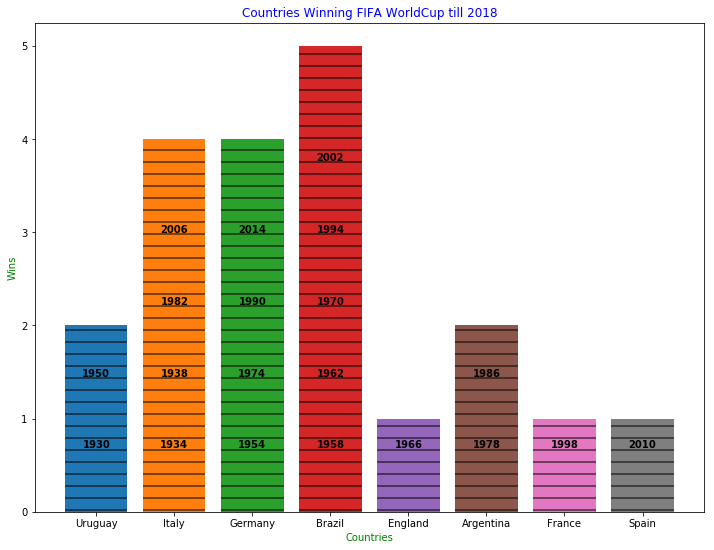

In [104]:
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

for j in range(8):
    plt.bar(j, len(values[j]),tick_label=names[j],hatch="-")
    j = j +1
plt.xticks(range(0,8),names)
plt.title("Countries Winning FIFA WorldCup till 2018",color='blue')
plt.xlabel("Countries", color = 'green')
plt.ylabel("Wins",color = 'green')

x=0 
for i in  range(len(names)):
    y = 0.72
    for j in range(len(values[i])):
        plt.text(x, y, ""+str(values[i][j]), color='black', va='center', fontweight='bold',horizontalalignment='center')
        y = y + 0.77
    x = x+1


In [107]:
total_wins = cups.Winner.count()

In [110]:
Winnerdata

{'Uruguay': [1930, 1950],
 'Italy': [1934, 1938, 1982, 2006],
 'Germany': [1954, 1974, 1990, 2014],
 'Brazil': [1958, 1962, 1970, 1994, 2002],
 'England': [1966],
 'Argentina': [1978, 1986],
 'France': [1998],
 'Spain': [2010]}